# Introduction

The dataset we'll use describes Euro daily exchange rates between 1999 and 2022. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

For instance, if the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro. 

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). 

The data source is the European Central Bank. Note that the dataset gets regular updates, and it has been downloaded in March 2023.

Our focus in this project will be on the exchange rate between the euro and the American dollar.

Now, Let's start by importing our file to as Panda DataFrame 

## I. Importing Data

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
# Enables Jupyter to display graphs
%matplotlib inline              
import datetime as dt



exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.info()
exchange_rates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6229 non-null   object 
 1   [Australian dollar ]      6229 non-null   object 
 2   [Bulgarian lev ]          5827 non-null   object 
 3   [Brazilian real ]         5961 non-null   object 
 4   [Canadian dollar ]        6229 non-null   object 
 5   [Swiss franc ]            6229 non-null   object 
 6   [Chinese yuan renminbi ]  5961 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6229 non-null   object 
 9   [Danish krone ]           6229 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6229 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6229 non-null   object 
 14  [Croatia

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-01-27,1.5289,1.9558,5.5104,1.4479,1.0017,7.3690,NaN,23.826,7.4378,...,4.8965,NaN,11.2108,1.4277,NaN,NaN,35.7020,20.4365,1.0865,18.7185
1,2023-01-26,1.5308,1.9558,5.5572,1.4568,1.0002,7.3893,NaN,23.818,7.4383,...,4.8818,NaN,11.1763,1.4292,NaN,NaN,35.6870,20.4961,1.0895,18.6127
2,2023-01-25,1.5360,1.9558,5.5690,1.4544,1.0020,7.3778,NaN,23.808,7.4381,...,4.9035,NaN,11.1335,1.4307,NaN,NaN,35.7180,20.4658,1.0878,18.6745
3,2023-01-24,1.5470,1.9558,5.6164,1.4517,1.0053,7.3642,NaN,23.874,7.4399,...,4.9171,NaN,11.0995,1.4337,NaN,NaN,35.6090,20.4234,1.0858,18.7687
4,2023-01-23,1.5529,1.9558,5.6372,1.4523,1.0013,7.3730,NaN,23.881,7.4393,...,4.9202,NaN,11.1183,1.4328,NaN,NaN,35.6300,20.4478,1.0871,18.6597


## II. Data Cleaning

Before we start creating data visualizations, we'll need to do a bit of data cleaning.

We do the following in the code below : 

- We rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
- We change the Time column to a datetime data type.
- We sort the values by Time in ascending order.
- We reset the index (and drop the initial index).

In [63]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar','Period\\Unit:': 'Time'}, inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

# We isolate the Time and the US_dollar columns. 
euro_to_dollar = exchange_rates[["Time", "US_dollar"]]

# We count the values in the US_dollar column
exchange_rates['US_dollar'].value_counts() #62 '-' characters

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.5196     1
1.1361     1
1.2557     1
1.2438     1
1.2683     1
Name: US_dollar, Length: 3718, dtype: int64

In [64]:
# Now, we drop all the rows where the - character appears in the US_dollar column and we convert the US_dollar column to a float data type.
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()
euro_to_dollar.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6167 entries, 0 to 6228
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6167 non-null   datetime64[ns]
 1   US_dollar  6167 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 144.5 KB


,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743


## III. Rolling Mean

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

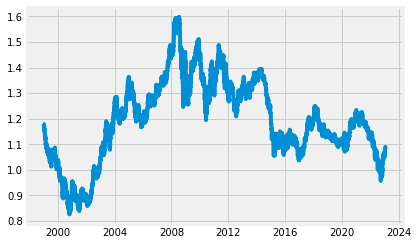

In [65]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

If we look at the line's shape, we see many small wiggles, rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Now, let's calculate the rolling means for the US_dollar column using a moving window of 30 days and add the rolling means to a new column named rolling_mean.

In [66]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.tail()

,Time,US_dollar,rolling_mean
6224,2023-01-23,1.0871,1.067830
6225,2023-01-24,1.0858,1.068817
6226,2023-01-25,1.0878,1.069927
6227,2023-01-26,1.0895,1.070747
6228,2023-01-27,1.0865,1.071560


Now, let's make different plots for different values of rolling mean.

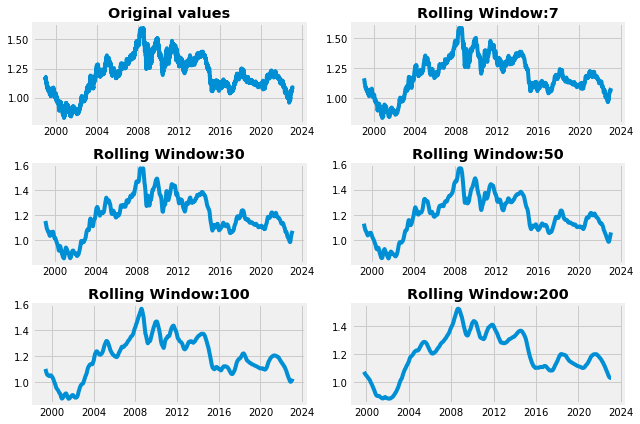

In [67]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 200]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

## IV. Coming up with an Idea

Let's spend some time coming up with an idea for the graph we want to build. We recall that our goal is to create a storytelling data visualization using the data we have.

Here are a few story ideas for our data:

- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.


- We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.


- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

## V. Coding the Graph

### A. Financial Crisis Example

In [68]:
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

### B. The Three US Presidencies Example

In [69]:
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]